## Загрузка и изучение данных

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
from scipy.stats import binom, norm
from math import sqrt

Загружаем файлы датасетов, создаем датафреймы, выводим первые 15 строк и основную информацию о них для ознакомления

In [2]:
#открываем файлы датасетов и создаем датафреймы
try:
    data_users = pd.read_csv('/datasets/users_go.csv')
    data_rides = pd.read_csv('/datasets/rides_go.csv')
    data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    data_users = pd.read_csv('https://.../datasets/users_go.csv') #часть ссылки скрыта ввиду NDA
    data_rides = pd.read_csv('https://.../datasets/rides_go.csv') #часть ссылки скрыта ввиду NDA
    data_subscriptions = pd.read_csv('https://.../datasets/subscriptions_go.csv') #часть ссылки скрыта ввиду NDA

#выводим первые 15 строк и основную информацию для каждого датафрейма
for d in [data_users,data_rides,data_subscriptions]:
    display(d.head(15))
    d.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Созданы 3 датафрейма из исходных датасетов с данными для последующей предобработки:**

- data_users с информацией о пользователях 1565 строк
- data_rides с информацией о поездках, 18068 строк
- data_subscriptions с информацией о подписках, 2 строки

**Исходные данные:**

- не имеют строк с явными пропущенными значениями, все строки заполнены значениями
- общее кол-во строк со значениями во всех столбцах одинаково.
- типы данных столбцов соответсвуют типам находящихся в них значений, для дальнейшей работы необходимо изменить тип данных только в столбце date датафрейма data_rides на временной
- названия столбцов приведены к "змеиному" регистру

## Предобработка данных

### Удаление пропусков

In [9]:
#проверка пропусков в датафрейме users
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [10]:
#проверка пропусков в датафрейме rides
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [11]:
#проверка пропусков в датафрейме subscriptions
data_subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Пропуски в датафреймах отсутствуют**

### Обработка аномальных значений

In [12]:
#смотрим кол-во поездок по возрастам
data_users['age'].value_counts().sort_values(ascending = False)

25    149
26    133
23    133
24    132
27    124
22    120
28    116
21     94
20     72
29     72
30     70
19     49
31     48
18     46
32     41
33     40
17     26
16     19
34     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

In [13]:
#проверяем сами возраста клиентов
data_users['age'].value_counts().index.sort_values(ascending = False)

Int64Index([43, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24,
            23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12],
           dtype='int64')

In [14]:
#проверим имена на аномальные значения
data_users['name'].sort_values().unique()

array(['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра',
       'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина',
       'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий',
       'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина',
       'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём',
       'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия',
       'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника',
       'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад',
       'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей',
       'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила',
       'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий',
       'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена',
       'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар',
       'Злата', 

In [15]:
#проверим значения в таблице с описанием подписки на аномальные значения
data_users['subscription_type'].sort_values().unique()

array(['free', 'ultra'], dtype=object)

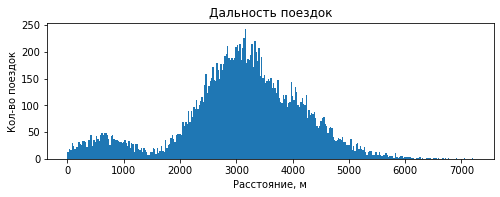

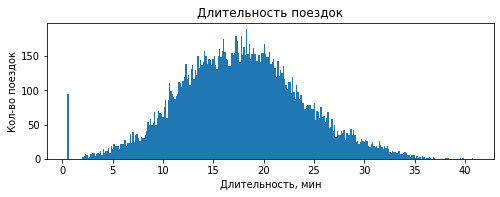

In [17]:
#построим первичные гистограммы для столбцов дистанция и длительность для выявления аномалий
data_rides['distance'].plot(kind = 'hist', figsize = (8,2.5), ylabel = 'кол-во', title = 'Дальность поездок', bins = 300)
plt.xlabel('Расстояние, м')
plt.ylabel('Кол-во поездок')
plt.show()
data_rides['duration'].plot(kind = 'hist', figsize = (8,2.5), title = 'Длительность поездок', bins = 300)
plt.xlabel('Длительность, мин')
plt.ylabel('Кол-во поездок')
plt.show()

*Виден аномальный пик длительности в районе 1 минуты, нужно проверить это связано с нахождением технической неисправности в самокате или с некорректностью данных. Проверим какие расстояния преодолевали пользователи при такой малой длительности*

In [18]:
#проверяем максимальные значения в столбцах distance, duration
data_rides[['distance','duration']].max()

distance    7211.007745
duration      40.823963
dtype: float64

In [19]:
#проверяем минимальные значения в столбцах distance, duration
data_rides[['distance','duration']].min()

distance    0.855683
duration    0.500000
dtype: float64

In [20]:
#проверяем значения столбца distance при аномально маленьких значениях длительности поездки меньше/равным 1 минуты
data_rides.query('duration <= 1')

,user_id,distance,duration,date
6531,701,4196.445201,0.5,2021-08-31
6570,704,4830.824371,0.5,2021-10-14
6680,712,4684.004397,0.5,2021-03-04
6695,713,5215.642710,0.5,2021-02-25
6768,718,5197.436649,0.5,2021-02-11
...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19
17242,1477,6724.932981,0.5,2021-01-12
17314,1483,4445.481070,0.5,2021-03-06
17505,1496,5722.551787,0.5,2021-02-14


In [21]:
# первая таблица слишком громоздкая, не все расстояния понятны, поэтому делаем группировку по столбцу duration и
#подсчитываем mean, max и min для столбца distance, 
#чтобы понять - это будут малые расстояния и время поездки из-за поломки самоката, либо это ошибки занесения данных
data_rides.query('duration <= 1').pivot_table(index = 'duration', values = 'distance', aggfunc = {'min','max','mean'})

,max,mean,min
duration,,,
0.5,7211.007745,5113.176549,4030.308008


In [22]:
#проверим можно ли заменить 0.5 минуты  просто на 5 минут, узнаем медианное значение преодоленного расстояния 
# при длительности поездки в интервале от 4.9 до 5.1 минуты
data_rides.query('4.9 <= duration <= 5.1').pivot_table(index = 'duration', values = 'distance', aggfunc = ('median')).median()

distance    799.672809
dtype: float64

Медианное значение в 800 метров для поездок в промежутке от 4.9-5.1 минуты точно не дотягивает до средних 5 км в полученных 95 строках аномальных значений длительности. Возможно, такие длительности связаны с проведением акции с бесплатными минутами, это нужно уточнить, при построении графиков для длительности поездок этот отрезок с выбросами необходимо отсечь, а при просчете выручки учесть, эти 95 строк составляют примерно  0.5% от общего количества данных.

**В датафрейме data_rides обнаружены аномальные значения в столбце duration, возможно это связано с проведением акции с бесплатными минутами, при построении графиков этот выброс учитывать не стоит**

### Изменение типов данных

In [27]:
#приведение столбца data к типу временному типу данных
data_rides['date'] = pd.to_datetime(data_rides['date'], format = '%Y-%m-%d')
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


<AxesSubplot:>

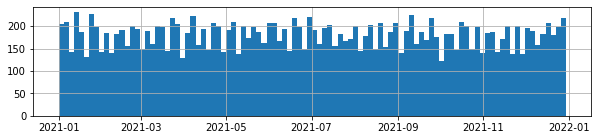

In [28]:
#построим гистограмму для столбца date
data_rides['date'].hist(figsize = (10,2), bins = 100)

*Представлены данные за 2021 год*

**Тип в столбце 'date' датафрейма data_rides изменен на временной**

### Удаление дубликатов

In [29]:
#проверяем столбец с названием города на наличие неявных дубликатов
data_users['city'].sort_values().unique()

array(['Екатеринбург', 'Краснодар', 'Москва', 'Омск', 'Пятигорск',
       'Ростов-на-Дону', 'Сочи', 'Тюмень'], dtype=object)

In [30]:
#проверяем таблицы на наличие явных дубликатов
for d in [data_users,data_rides,data_subscriptions]:
    print(d.duplicated().sum())

31
0
0


In [31]:
#удаляем явные дубликаты в таблице data_users
data_users = data_users.drop_duplicates().reset_index(drop = True)

In [32]:
#проверяем, что нужное кол-во строк удалено
len(data_users)

1534

**Удалены явные дубликаты в таблице data_users и обновлены индексы таблицы**

### Добавление новых столбцов

In [33]:
#добавляем столбец с месяцем поездки в таблицу rides
data_rides['month_of_rides'] = data_rides['date'].dt.month

In [34]:
#проверяем добавление столбца
data_rides.head(10)

,user_id,distance,duration,date,month_of_rides
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


**В датафрейм data_rides добавлен столбец month_of_rides с обозначением месяца поездки**

**На этапе предобработки данных были выполнены следующие действия:**

- проверено, что в исходных данных нет явных пропусков
- изменен тип данных в столбце date датафрейма data_rides на временной 
- в датафрейме data_rides добавлен столбец month_of_rides с обозначением месяца поездки
- удалены явные дубликаты из датафрейма с информацией о пользователях (data_users)
- добавлен новый столбец month_of_rides в датафрейм data_rides

## Исследовательский анализ данных

### Частота встречаемости городов

Строим столбчатую гистограмму распределения пользователей по городам

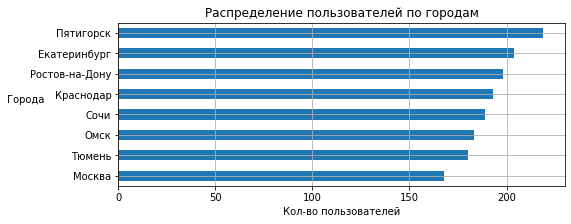

In [36]:
#делаем сводную таблицу, в качестве index выбирая столбец с городами и 
#подсчитывая кол-во строк пользователей о городам, применяем сразу сортировку
data_users.pivot_table(index = 'city', values = 'user_id', aggfunc = {'count'}).sort_values(by = 'count').reset_index(drop = False)\
    .plot(kind = 'barh', x = 'city', y = 'count', grid = True, figsize = (8,3), legend = False)
#добавляем заголок
plt.title ('Распределение пользователей по городам')
#добавляем подписи осей
plt.xlabel('Кол-во пользователей')
plt.ylabel('Города', rotation = 0)
plt.show()

In [38]:
#тоже самое, только в количественном виде
data_users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

*Меньше всего пользователей в Москве - 168, больше всех в Пятигорске - 219, сильных перекосов в кол-ве пользователей по городам нет*

### Соотношение пользователей с подпиской и без подписки

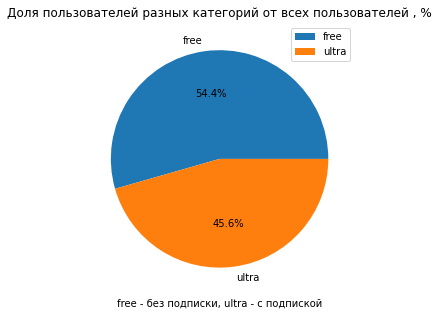

In [40]:
#строим круговую гистограмму распределения пользователей с подпиской и без
data_users.groupby('subscription_type')['subscription_type'].count().plot(kind = 'pie', grid = True,\
    title = 'Доля пользователей разных категорий от всех пользователей , %', figsize = (6,5), legend = True, autopct = '%.1f%%')
plt.ylabel('')
plt.xlabel('free - без подписки, ultra - с подпиской', rotation = 0)
plt.legend(loc = 1)
plt.show()

In [41]:
#тоже самое, только в количественном виде
data_users.groupby('subscription_type')['subscription_type'].count()

subscription_type
free     835
ultra    699
Name: subscription_type, dtype: int64

*Пользователей без подписки больше - 835, с подпиской - 699*

### Возраст пользователей

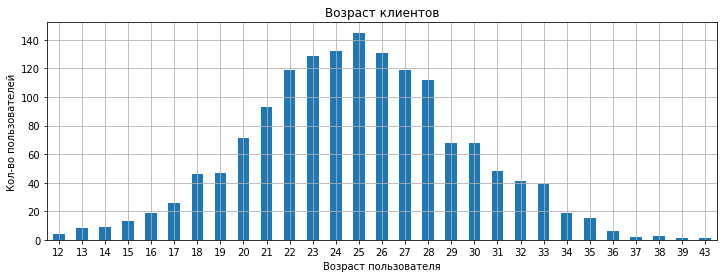

In [42]:
#строим гистограмму распределения возраста клиентов
data_users.groupby('age')['age'].count().plot(kind = 'bar', title = 'Возраст клиентов', xlabel = 'Возраст пользователя',\
                                              ylabel = 'Кол-во пользователей', grid = True, figsize = (12,4))
plt.xticks(rotation = 0)
plt.show()

*График похож на нормальное распределение. Больше всего клиентов от 22 до 28 лет с пиком в 25 лет. Меньше всех пользователей до 18 лет и взрослых после 34*

### Продолжительность поездки

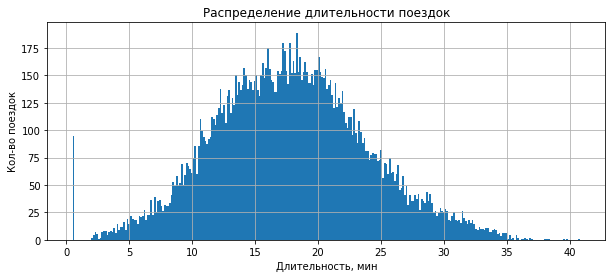

In [43]:
#строим гистограмму длительности поездки
data_rides['duration'].hist(figsize = (10,4), bins = 300)
plt.xlabel('Длительность, мин')
plt.ylabel('Кол-во поездок')
plt.title('Распределение длительности поездок')
plt.show()

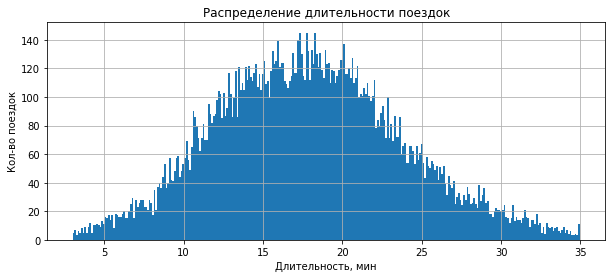

In [44]:
#уберем выбросы
data_rides.query('3 < duration < 35')['duration'].hist(figsize = (10,4), bins = 300)
plt.xlabel('Длительность, мин')
plt.ylabel('Кол-во поездок')
plt.title('Распределение длительности поездок')
plt.show()

*График нормального распределения с наибольшей частотой длительности поездок от 13 до 21 минуты*

### Расстояние, которое пользователь преодолел за одну поездку

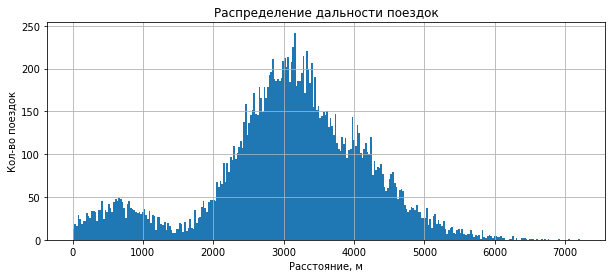

In [45]:
#строим гистограмму расстояния поездки
data_rides['distance'].hist(figsize = (10,4), bins = 300)
plt.xlabel('Расстояние, м')
plt.ylabel('Кол-во поездок')
plt.title('Распределение дальности поездок')
plt.show()

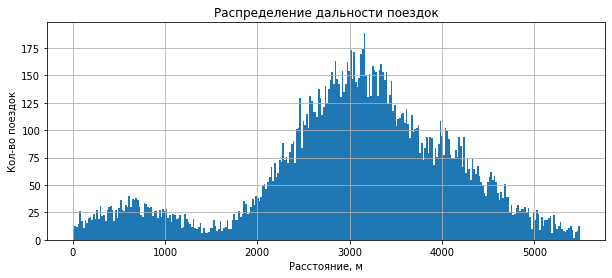

In [46]:
#строим гистограмму расстояния поездки без слишком дальних поездок
data_rides.query('distance < 5500')['distance'].hist(figsize = (10,4), bins = 300)
plt.xlabel('Расстояние, м')
plt.ylabel('Кол-во поездок')
plt.title('Распределение дальности поездок')
plt.show()

*По гистограммам видно, что чаще всего преодолевается расстояние в интервале между 2.8 км и 3.5 км и виден явный провал в области 1.5 км. Также видно, что на небольшой дистанции до 1.5 км пользователи чаще преодолевают расстояние в диапазоне 0,6-0,7км*

<AxesSubplot:xlabel='distance', ylabel='duration'>

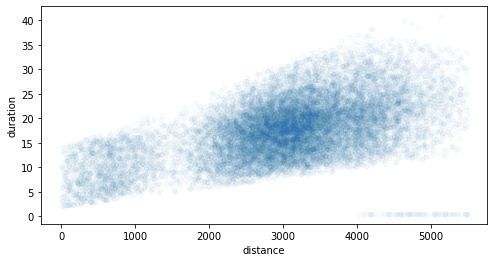

In [47]:
#посмотрим насколько зависимы между собой длительность и дальность поездки
data_rides.query('distance < 5500')[['duration','distance']]\
.plot(kind = 'scatter',x = 'distance', y = 'duration', figsize = (8,4), alpha = 0.025 )

In [48]:
data_rides['distance'].corr(data_rides['duration'])

0.5367776552505346

*Между длительностью поездки и расстоянием зависимость присутствует, но не ярко выраженная. Помимо этого на на диаграмме присутствует много шума. Больше всего поездок происходило на расстояние примерно 3 км с длительности в интервале 15-19 мин*

**При проведении исследовательского анализа были получены следующие результаты:**
- меньше всего пользователей в Москве - 168, больше всех в Пятигорске - 219, сильных перекосов в кол-ве пользователей по городам нет
- пользователей без подписки больше - 835, с подпиской – 699
-  больше всего клиентов от 22 до 28 лет с пиком в 25 лет. Меньше всех пользователей до 18 лет и взрослых после 34
- наибольшее кол-во поездок происходит в интервале от 13 до 21 минуты у всех пользователей. 
- чаще всего преодолевается расстояние в интервале между 2.8 км и 3.5 км и меньше всего -  в области 1.5 км
- на небольшой дистанции до 1.5 км пользователи часто преодолевают расстояние в диапазоне 0,6-0,7км
- чаще всего поездки происходили на расстояние примерно 3 км при длительности поездки в промежутке 15-19 минут

## Объединение данных

### Создание общего датафрейма из всех таблиц

In [49]:
#создаем одну общую таблицу из трех, указываем параметр left, чтобы даже при отсутствии поездок у пользователя
#его данные остались в объединенной таблице.
data_all = data_users.merge(data_rides, on = 'user_id', how = 'left')
data_all = data_all.merge(data_subscriptions, on = 'subscription_type')

Получаем количество строк нового созданного датафрейма

In [51]:
data_all.shape[0]

18068

In [52]:
#все равно проверяем пропуски в новом датафрейме
data_all.isna().sum().sort_values(ascending = False)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month_of_rides       0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [53]:
#смотрим на конечную таблицу
data_all.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month_of_rides,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


*Общий датафрейм создан*

### Создание датафреймов  для каждого вида подписки

#### Датафрейм с данными о пользователях без подписки

In [54]:
#создаем новый датафрейм из общего, в фильтре указываем значения столбца subscription_type == 'free' 
data_users_free = data_all.query('subscription_type == "free"')
data_users_free.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month_of_rides,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,8,50,0


In [55]:
#проверяем длину нового датафрейма
len(data_users_free)

11568

#### Датафрейм с данными о пользователях с подпиской

In [56]:
#создаем новый датафрейм из общего, в фильтре указываем значения столбца subscription_type == 'ultra' 
data_users_ultra = data_all.query('subscription_type == "ultra"')
data_users_ultra.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month_of_rides,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [57]:
#проверяем длину нового датафрейма
len(data_users_ultra)

6500

In [58]:
#проверяем, что новые датафреймы в общей длине строк дают первоначальный общий датафрейм
len(data_all) == ((len(data_users_free)) + (len(data_users_ultra)))

True

**Создано еще два датафрейма с информацией о разных категориях пользователей: с подпиской и без**

#### Визуализация длительности поездок и расстояния подьзователей с подпиской и без

##### Длительность поездок

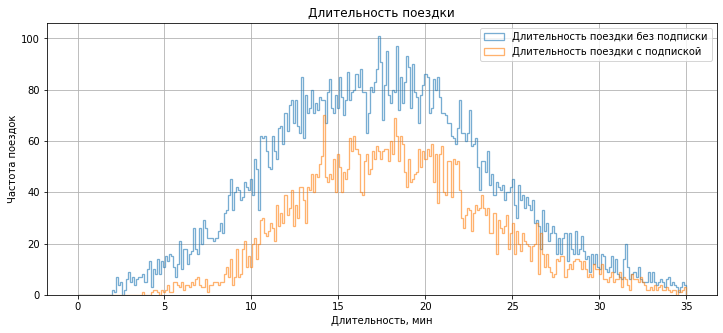

In [79]:
#строим график для пользователей без подписки и накладываем его на график пользователей с подпиской
ax_duration = data_users_free.query('duration > 0.5').plot(kind = 'hist', histtype = 'step', y = 'duration', \
                     range = (0,35), linewidth = 1.3, bins = 300, alpha = 0.6,\
                     label = 'Длительность поездки без подписки',grid = True, figsize = (12,5))
data_users_ultra.query('duration > 0.5').plot(kind = 'hist', histtype = 'step', y = 'duration', \
                     range = (0,35), linewidth = 1.3, bins = 300, alpha = 0.6, ax = ax_duration,\
                     label = 'Длительность поездки с подпиской',\
                    grid = True, title = 'Длительность поездки', figsize = (12,5))
plt.xlabel('Длительность, мин')
plt.ylabel('Частота поездок')
plt.show()

*Графики распределения частоты длительности поездок схожи и приближаются к нормальному распределению, при сокращении выборки пользователей без подписки в 2 раза до кол-ва пользователей с подпиской, графики возможно должны больше приблизиться друг к другу.*

**Самый частый интервал длительности поездки двух разных категорий схож: 13 мин - 21 мин.**

##### Дальность поездки

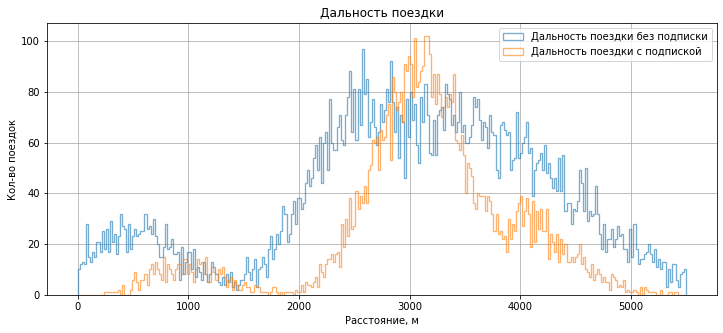

In [80]:
#строим график для пользователей без подписки и накладываем его на график пользователей с подпиской
ax_distance = data_users_free.plot(kind = 'hist', histtype = 'step', y = 'distance', \
                     range = (0,5500), linewidth = 1.3, bins = 300, alpha = 0.6,\
                     label = 'Дальность поездки без подписки',grid = True, figsize = (12,5))
data_users_ultra.plot(kind = 'hist', histtype = 'step', y = 'distance', \
                     range = (0,5500), linewidth = 1.3, bins = 300, alpha = 0.6, ax = ax_distance,\
                     label = 'Дальность поездки с подпиской',\
                      grid = True, title = 'Дальность поездки', figsize = (12,5))
plt.xlabel('Расстояние, м')
plt.ylabel('Кол-во поездок')
plt.show()

Кол-во значений в категории без подписки почти в 2 раза больше, чем в категории пользователей с подпиской. 

**По графику видно, что самые часто встречающиеся расстояния в категориях:**
- пользователи с подпиской: 2.8 км - 3.4 км
- пользователи без подписки: 2.3 км- 3.9 км

*Без подписки пользователи чаще берут самокаты на короткие расстояния до 0.8 км.*



**При создании новых таблиц и визуалиции были получены следующие результаты:**


**Создано 3 новых датафрейма:**
- с общей информацией обо всех пользователях, собранной из всех 3 первичных датафреймов
- со всей информацией о пользователях, имеющих подписку
- со всей информацией о пользователях, не имеющих подписку

Полученные графики показали, что:

**Самый частый интервал длительности поездкок в двух разных категориях схож: 13 мин - 21 мин.**

**Самые часто встречающиеся расстояния в категориях:**
- пользователи с подпиской: 2.8 км - 3.4 км
- пользователи без подписки: 2.3 км- 3.9 км

**Также было обнаружено, что без подписки пользователи чаще берут самокаты на короткие расстояния до 0.8 км.**


## Подсчёт выручки

### Создание агрегированного датафрейма с данными о поездках

In [61]:
#создаем агрегигованную таблицу для каждого пользователя с группировкой по месяцам со следующими посчитанными значениями:
#общее кол-во поездок, общее преодоленное расстояние, общая длительность поездок по месяцам
data_all_users_pivot = data_all.pivot_table(index = ['user_id','month_of_rides'],\
                values = ['distance','duration'], aggfunc={'distance' : ['sum','count'], 'duration' : 'sum'}).reset_index()
data_all_users_pivot

user_id month_of_rides distance                 duration
                                count           sum        sum
0           1              1        2   7027.511294  41.416640
1           1              4        1    754.159807   6.232113
2           1              8        2   6723.470560  44.776802
3           1             10        2   5809.911100  31.578017
4           1             11        3   7003.499363  53.397424
...       ...            ...      ...           ...        ...
11326    1534              6        2   3409.468534  24.812678
11327    1534              8        2   7622.453034  47.205960
11328    1534              9        1   4928.173852  22.560373
11329    1534             11        4  13350.015305  76.342174
11330    1534             12        1   2371.711192  15.893917

[11331 rows x 5 columns]

### Добавление столбца с помесячной выручкой

In [62]:
#добавляем в объединенный датафрейм data_all столбец со стоимостью одной поездки,
#округляя длительность поездки до целого значения вверх
data_all['cost_of_ride'] = data_all['start_ride_price'] + (np.ceil(data_all['duration'])*data_all['minute_price'])

Обновляем агрегированную таблицу, добавляя столбец со стоимостью поездок за месяц, типом подписки и стоимостью подписки

In [63]:
data_all_users_pivot = data_all.pivot_table(index = ['user_id','month_of_rides'],\
                values = ['distance','duration','cost_of_ride','subscription_fee', 'subscription_type'], \
                aggfunc={'distance' : ['sum','count'], 'duration' : 'sum', 'cost_of_ride' : 'sum',\
                         'subscription_type': 'first', 'subscription_fee': 'first'}).reset_index()
data_all_users_pivot

user_id month_of_rides cost_of_ride distance                 duration  \
                                      sum    count           sum        sum   
0           1              1        252.0        2   7027.511294  41.416640   
1           1              4         42.0        1    754.159807   6.232113   
2           1              8        276.0        2   6723.470560  44.776802   
3           1             10        192.0        2   5809.911100  31.578017   
4           1             11        336.0        3   7003.499363  53.397424   
...       ...            ...          ...      ...           ...        ...   
11326    1534              6        308.0        2   3409.468534  24.812678   
11327    1534              8        484.0        2   7622.453034  47.205960   
11328    1534              9        234.0        1   4928.173852  22.560373   
11329    1534             11        824.0        4  13350.015305  76.342174   
11330    1534             12        178.0        1   2371.711192  15.893917   

      subscription_fee subscription_type  
                 first             first  
0                  199             ultra  
1                  199             ultra  
2                  199             ultra  
3                  199             ultra  
4                  199             ultra  
...                ...               ...  
11326                0              free  
11327                0              free  
11328                0              free  
11329                0              free  
11330                0              free  

[11331 rows x 8 columns]

Обновляем агрегированную таблицу, добавляя столбец с выручкой за месяц с одного клиента

In [64]:
data_all_users_pivot['full_cost_of_month'] = \
    data_all_users_pivot[('cost_of_ride','sum')] + data_all_users_pivot[('subscription_fee','first')]
data_all_users_pivot

user_id month_of_rides cost_of_ride distance                 duration  \
                                      sum    count           sum        sum   
0           1              1        252.0        2   7027.511294  41.416640   
1           1              4         42.0        1    754.159807   6.232113   
2           1              8        276.0        2   6723.470560  44.776802   
3           1             10        192.0        2   5809.911100  31.578017   
4           1             11        336.0        3   7003.499363  53.397424   
...       ...            ...          ...      ...           ...        ...   
11326    1534              6        308.0        2   3409.468534  24.812678   
11327    1534              8        484.0        2   7622.453034  47.205960   
11328    1534              9        234.0        1   4928.173852  22.560373   
11329    1534             11        824.0        4  13350.015305  76.342174   
11330    1534             12        178.0        1   2371.711192  15.893917   

      subscription_fee subscription_type full_cost_of_month  
                 first             first                     
0                  199             ultra              451.0  
1                  199             ultra              241.0  
2                  199             ultra              475.0  
3                  199             ultra              391.0  
4                  199             ultra              535.0  
...                ...               ...                ...  
11326                0              free              308.0  
11327                0              free              484.0  
11328                0              free              234.0  
11329                0              free              824.0  
11330                0              free              178.0  

[11331 rows x 9 columns]

In [69]:
#обновляем имена столбцов
data_all_users_pivot.columns = ['user_id', 'Номер месяца', 'Стоимость поездок за месяц, руб', 'Кол-во поездок',\
        'Общее расстояние, м', 'Общая длительность, мин', 'Стоимость подписки, руб', 'Тип подписки', 'Выручка с клиента, руб']
data_all_users_pivot[['user_id','Номер месяца','Кол-во поездок','Общее расстояние, м','Общая длительность, мин',\
                      'Стоимость поездок за месяц, руб', 'Выручка с клиента, руб','Стоимость подписки, руб', 'Тип подписки']]

,user_id,Номер месяца,Кол-во поездок,"Общее расстояние, м","Общая длительность, мин","Стоимость поездок за месяц, руб","Выручка с клиента, руб","Стоимость подписки, руб",Тип подписки
0,1,1,2,7027.511294,41.416640,252.0,451.0,199,ultra
1,1,4,1,754.159807,6.232113,42.0,241.0,199,ultra
2,1,8,2,6723.470560,44.776802,276.0,475.0,199,ultra
3,1,10,2,5809.911100,31.578017,192.0,391.0,199,ultra
4,1,11,3,7003.499363,53.397424,336.0,535.0,199,ultra
...,...,...,...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,24.812678,308.0,308.0,0,free
11327,1534,8,2,7622.453034,47.205960,484.0,484.0,0,free
11328,1534,9,1,4928.173852,22.560373,234.0,234.0,0,free
11329,1534,11,4,13350.015305,76.342174,824.0,824.0,0,free


**Создана сводная таблица с основными показателями, сгруппированными по id пользователя и месяцам.**

## Проверка гипотез

### Трата времени на поездки пользователей разных групп

*Существует предположение: "Тратят ли пользователи с подпиской больше времени на поездки?"*

**Формируем нулевую и альтернативную гипотезы и проводим двухвыборочный T-тест для двух независимых выборок**
- Ho- длительность поездок пользователей с подпиской равна длительности поездок польователей без подписки
- H1 - длительность поездок пользователей с подпиской больше, чем без подписки

In [70]:
alpha = 0.05
print(f'Среднее значение для выборки пользователей с подпиской: {data_users_ultra["duration"].mean()}')
print(f'Среднее значение для выборки пользователей без подписки: {data_users_free["duration"].mean()}')
results_time = st.ttest_ind(data_users_ultra['duration'], data_users_free['duration'],  alternative='greater')
print(f'p-value: {results_time.pvalue}')

if results_time.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Среднее значение для выборки пользователей с подпиской: 18.54198516280583
Среднее значение для выборки пользователей без подписки: 17.39090929866399
p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Нулевая гипотеза не подтвердилась. Вероятность того, что средняя длительность поездок пользователей с подпиской больше, значима.**

### Оптимальное расстояние поездки

*Существует предположение: "Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката."*

**Формируем нулевую и альтернативную гипотезы и проводим одновыборочный T-тест**

- Но - среднее расстояние одной поездки пользователей с подпиской - 3130 метров
- H1 - среднее расстояние одной поездки пользователей с подпиской больше 3130 метров

In [71]:
optimal_distance = 3130
print(f'Среднее значение расстояния для выборки пользователей с подпиской: {data_users_ultra["distance"].mean()}')
results_optimal_distance = st.ttest_1samp(data_users_ultra['distance'], optimal_distance, alternative='greater')
print(f'p-value: {results_optimal_distance.pvalue}')

if results_optimal_distance.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее значение расстояния для выборки пользователей с подпиской: 3115.4453880370247
p-value: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Нулевая гипотеза не может быть отвергнута, вероятность получить среднее в 3130 метров для пользователей с подпиской больше уровня статистической значимости. Значит, среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.**

### Помесячная выручка от пользователей разных категорий

*Существует гипотеза: "Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки."*

**Формируем нулевую и альтернативную гипотезы и проводим двухвыборочный T-тест для двух независимых выборок**

- Ho - средние значения помесячных выручек от пользователей с подпиской и без подписки одинаковы
- H1 - среднее значение помесячной выбурчки от пользователей с подпиской выше, чем от пользователей без подписки

In [72]:
print('Среднее значение помесячной выручки для группы пользователей с подпиской:', \
    data_all_users_pivot.loc[data_all_users_pivot['user_id'].isin(data_users_ultra['user_id'].unique()), 'Выручка с клиента, руб'].mean())
print('Среднее значение помесячной выручки для группы пользователей без подписки:', \
    data_all_users_pivot.loc[data_all_users_pivot['user_id'].isin(data_users_free['user_id'].unique()), 'Выручка с клиента, руб'].mean())

results_cost_of_ride = st.ttest_ind(\
    data_all_users_pivot.loc[data_all_users_pivot['user_id'].isin(data_users_ultra['user_id'].unique()), 'Выручка с клиента, руб'],\
    data_all_users_pivot.loc[data_all_users_pivot['user_id'].isin(data_users_free['user_id'].unique()), 'Выручка с клиента, руб'],\
                                   alternative='greater')
print(f'p-value: {results_cost_of_ride.pvalue}')

if results_cost_of_ride.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Среднее значение помесячной выручки для группы пользователей с подпиской: 362.7921906022502
Среднее значение помесячной выручки для группы пользователей без подписки: 328.6413651073845
p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


*Нулевая гипотеза не подтвердилась. Помесячная выручка от группы пользователей с подпиской выше, чем от пользователей без подписки.*

**После проверки гипотез получились следующие результаты:**

- пользователи с подпиской тратят больше времени на поездки
- среднее расстояние одной поездки пользователей с подпиской приближено к  3130 метрам - оптимальному расстоянию с точки зрения износа самоката
- помесячная выручка от группы пользователей с подпиской выше, чем от пользователей без подписки


## Распределения

### Рассылка промокодов

/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


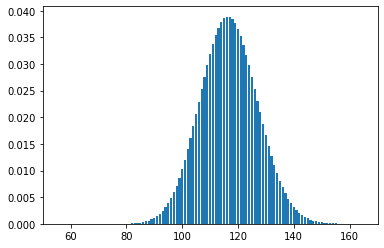

In [81]:
#зададим параметры биномиального распределения, параметр n будем в дальнейшем менять и подбирать необходимый
n=1168 # общее кол-во направляемых промокодов
p=0.1 #вероятность продления подписки после бесплатного месяца

distr = [] #создаем пустой список для записывания вероятностей биномиального распределения

# цикл для расчета вероятности для каждого значения в наборе
for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
#строим график биномиального распределения
plt.bar(range(0, n + 1), distr)
#уменьшаем диапазон значений по оси х для наглядности
plt.xlim(50, 170)
plt.show()

*Теперь необходимо подобрать значение n для того, чтобы хвост от 100 влево составлял примерно 5% от общей площади*

In [74]:
#через апроксимацию нормальным распределением попробуем подобрать параметр n,
#считаем, что мат. ожидание и ст. отклонение биномиального распределения и нормального равны

mu = n * p #считаем мат. ожидание
sigma = sqrt(n * p * (1 - p)) #считаем ст. отклонение
prob = 0.05 #необходимая вероятность невыполнения плана, левый хвост
distr = st.norm(mu, sigma) # строим нормальное распределение
result_0 = distr.cdf(100) #считаем вероятность получить значение <= 100 продлений подписки
print(f'Вероятность невыполнения плана: {result_0}') #выводим полученную вероятность
#спустя 10 попыток удалось подобрать n для нужной вероятности 

Вероятность невыполнения плана: 0.050650790692463


**1168 - минимальное количество промокодов, которое нужно разослать, чтобы вероятность не выполнить план (100 продлений бесплатного периода подписки после проведения акции) была примерно 5 %**

### Рассылка Push-уведомлений

Проверяем условие для хорошей апроксимации, чтобы мат. ожидание +-3 стандартных отклонения лежало в промежутке, на котором определено биномиальное распределение - [0,1000000]

```
mu = n * p = 1 000 000 * 0.4 = 400 000

sigma = 3 * ((n * p * (1 - p))) ** 0.5  = 1469

400 000 +- 1469 точно попадает в диапазон [0,1000000]
```

#### Находим вероятность 

In [75]:
n_1 = 1000000 # общее кол-во отправленных Push-уведомлений
p_1 = 0.4 # вероятность открытия Push

#считаем, что мат. ожидание и ст. отклонение нормального распределения равны 
#мат. ожиданию и ст. отклонению биномиального распределения

#считаем мат. ожидание
mu_1 = n_1*p_1 
#считаем ст. отклонение
sigma_1 = sqrt(n_1*p_1*(1 - p_1))

#задаем нормальное распределение
distr_1 = st.norm(mu_1,sigma_1)
#посчитаем вероятность хвоста слева от 399500 пользователей
result_1 = distr_1.cdf(399500)
#выводим вероятность того, что не более 399500 пользователей откроют push
print(f'Вероятность того, что не более 399,5 тыс. пользователей откроют письма ∼ {result_1}')

Вероятность того, что не более 399,5 тыс. пользователей откроют письма ∼ 0.15371708296369768


#### Построение графика распределения 

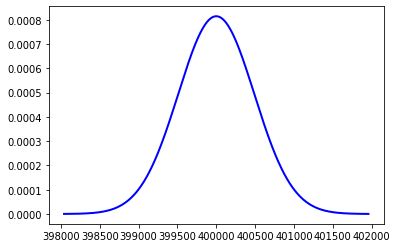

In [76]:
# зададим функцию, которая выдаёт 1000 чисел,
# равномерно распределённых от start до stop
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result

#зададим границы промежутка, где будем строить график: mu +- 4 sigma
left_1=int(mu_1 - 4*sigma_1)
right_1=int(mu_1 + 4*sigma_1)

#рисуем график нормального распределения
#получим список из 1000 чисел от left до right
x_1 = linspace(left_1,right_1,1000)

#используем синию линию ширины 2
theplot = plt.subplot()
theplot.plot(x_1, norm.pdf(x_1, mu_1, sigma_1), 'b-', lw=2)

#отобразим график распределения
plt.show()

**Получили апроксимированный график биномиального распределения нормальным с мат. ожиданием 400000. Вероятность того, что не более 399,5 тыс. пользователей откроют письма составляет всего около 15,37%**

**При построении распределений были получены следующие результаты:**
- не менее 1168 промокодов необходимо разослать, чтобы вероятность того, что 100 пользователей из них не продлят подписку составляла 5%.    
- при отправке 1 млн. Push-уведомлений в приложение вероятность того, что не более 399,5 тыс. пользователей откроют письма составляет примерно 15,37% 

## Общие выводы

**На этапе предобработки данных были выполнены следующие действия:**

- данные проверены на наличие пропусков
- исправлены некорректные значения в столбце с длительностью поездок 
- изменен тип данных в столбце с датой поездки
- удалены явные дубликаты из таблицы с информацией о пользователях
- добавлен новый столбец для дальнейшего исследования

**При проведении исследовательского анализа были получены следующие результаты:**
- меньше всего пользователей в Москве - 168, больше всех в Пятигорске - 219, сильных перекосов в кол-ве пользователей по городам нет
- пользователей без подписки больше - 835, с подпиской – 699
-  больше всего клиентов от 22 до 28 лет с пиком в 25 лет. Меньше всех пользователей до 18 лет и взрослых после 34
- наибольшее кол-во поездок происходит в интервале от 13 до 21 минуты у всех пользователей. 
- чаще всего преодолевается расстояние в интервале между 2.8 км и 3.5 км и меньше всего -  в области 1.5 км
- на небольшой дистанции до 1.5 км пользователи часто преодолевают расстояние в диапазоне 0,6-0,7км
- чаще всего поездки происходили на расстояние примерно 3 км при длительности поездки в промежутке 15-19 минут

**Для визуализации и проверки гипотез была создана сводная таблица и 3 новых датафрейма:**
- с общей информацией обо всех пользователях, собранной из всех 3 первичных датафреймов
- со всей информацией о пользователях, имеющих подписку
- со всей информацией о пользователях, не имеющих подписку

Полученные графики показали, что:

**Самый частый интервал длительности поездок в двух категориях схож: 13 мин - 21 мин.**

**Самые часто встречающиеся расстояния поездок у пользователей:**
- с подпиской: 2.8 км - 3.4 км
- без подписки: 2.3 км- 3.9 км

**Также было обнаружено, что без подписки пользователи чаще берут самокаты на короткие расстояния до 0.8 км.**

**При проверке гипотез получились следующие результаты:**

- пользователи с подпиской тратят больше времени на поездки
- среднее расстояние одной поездки пользователей с подпиской не превышает 3130 метров - оптимальное расстояние с точки зрения износа самоката
- помесячная выручка от группы пользователей с подпиской выше, чем от пользователей без подписки

**При построении распределений были получены следующие результаты:**
- не менее 1168 промокодов необходимо разослать, чтобы вероятность того, что 100 пользователей из них не продлят подписку, составляла примерно 5%.    
- при отправке 1 млн. Push-уведомлений в приложение вероятность того, что не более 399,5 тыс. пользователей откроют письма составляет примерно 15,37%

**Полученные результаты исследования и проверки гипотез привели к основному выводу: пользователи с подпиской являются более интересными и "выгодными" для компании. Привлечение большего кол-ва пользователей на платную подписку поможет развитию бизнеса.**

Также предлагаю следующие рекомендации по заполнению значений:
- при заполнении таблицы с общей информацией о пользователях добавить проверку на уникальность в столбце 'user_id'
- проверить данные с информацией о поездках за другие временные периоды на наличие некорректных данных в столбце с длительностью поездки для понимания, сколько % составляют такие ошибки от общего числа значений (в данном исследовании менее 1%)